In [1]:
#How OLD are the winners WHEN they GET the prize?

In [78]:
#1. import libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

#import data
data = pd.read_csv("dataset.csv")
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [26]:
#2. clean and transform data

#a. Calculate the age of every nobel prize winners when them receive the prize: birth_year - year

#turn birth_date to date_time data type
data["birth_date"] = data[ "birth_date"].apply(pd.to_datetime)

#turn year to int type
data["year"] = data["year"].astype(int)

#extract year from birth_date
data["birth_year"] = data["birth_date"].dt.year

#turn birth_year into int type
data["birth_year"] = data["birth_year"].apply(pd.to_numeric) #turn it to float first
data = data.dropna(subset = ["birth_year"]) #drop all row with nan value in birth_year column
data["birth_year"] = data["birth_year"].astype(int) #change birth_year to int

#create a new column to define the age of nobel prize winner when they receive prize
data["win_prize_age"] = data["year"] - data["birth_year"]

In [65]:
#3. select data to plot
winners = data[["year", "win_prize_age"]] #define a new dataframe
winners_age = winners.groupby("year").mean().reset_index() #get the mean of each decade age for mean line
winners_age.columns = ["year","avg_age"]
winners_age

,year,avg_age
0,1901,61.000000
1,1902,56.285714
2,1903,52.000000
3,1904,63.000000
4,1905,59.200000
...,...,...
108,2012,66.444444
109,2013,71.416667
110,2014,57.769231
111,2015,73.000000


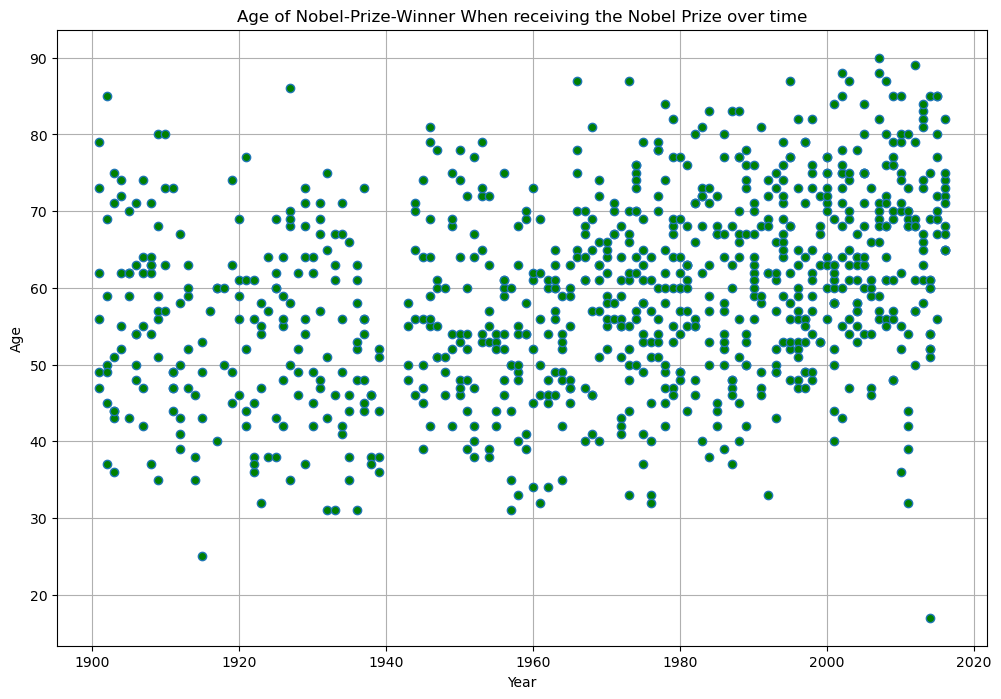

In [79]:
#4.plot the data
#a. Create a figure
fig, ax = plt.subplots(figsize = (12, 8))

#draw the plot on ax object
ax.plot(winners["year"],
       winners["win_prize_age"],
       linestyle = "None",
       marker = "o",
       markerfacecolor = "green")

#customize title
ax.set_title("Age of Nobel-Prize-Winner When receiving the Nobel Prize over time")

#customize axis
ax.set_xlabel("Year")
ax.set_ylabel("Age")

#add grid
ax.grid(True)

#add a average line